# Sigmoid
Vytvořil jsem pro vás tenhle notebook aby jste si vyzkoušeli a koukli se na to jak funguje funkce sigmoid
Můžete se kouknout jak různě se mění hodnoty při změně funkce.

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
# Create a method for plotting the sigmoid
# YOU DON'T HAVE TO UNDERSTAND THIS, IT'S JUST MATH ;)
def plt_sigmoid(
    x : torch.Tensor,
    y : torch.Tensor,
    x_compare : torch.Tensor = torch.zeros(1),
    y_compare : torch.Tensor = torch.zeros(1)):

  """YOU DON'T HAVE TO UNDERSTAND THIS, IT'S JUST MATH ;)"""

  plt.figure(figsize=(10,7))
  plt.grid(zorder = 1)  # create a grid, zorder determines the display order so the grid isn't above the points

  plt.scatter(x, y, c = "b", s = 20, label = "Sigmoid", zorder = 2) # plot our sigmoid

  if x_compare.numel() != 1 and y_compare.numel() != 1: # compare if we have any tensors to compare using numel -- returns 1 if empty
    plt.scatter(x_compare, y_compare, c = "g", s = 20, zorder = 2, label = "Sigmoid for Comparison") # if we want to compare, plot the second sigmoid

    # compare if the comparison values are greater than the original ones, and if so, overwrite them so the grid is generated correctly
    if x_compare.max() > x.max():
      x = x_compare
    if y_compare.max() > y.max():
      y = y_compare

  inx = torch.tensor([i for i in range(len(x)) if i%(round(len(x)/20))==0]) # it's quite complex, but if you break it down it's not; in short, it takes the number of values, divides it by 20, rounds it, and that's the step size (how many x values will be displayed)
  iny = torch.arange(y.min() , y.max()+0.1, round(y.max().item() /10, 2)) # the same for y; if it's from 0 - 10, it will display by 1, and if from 0 - 1, then by 0.1
  plt.xticks(torch.index_select(x, 0, inx), zorder = 1) # display x axis
  plt.yticks(iny, zorder = 1)# display y axis

  # select every 10th element and plot it on the x-axis
  plt.legend(prop={"size": 10})

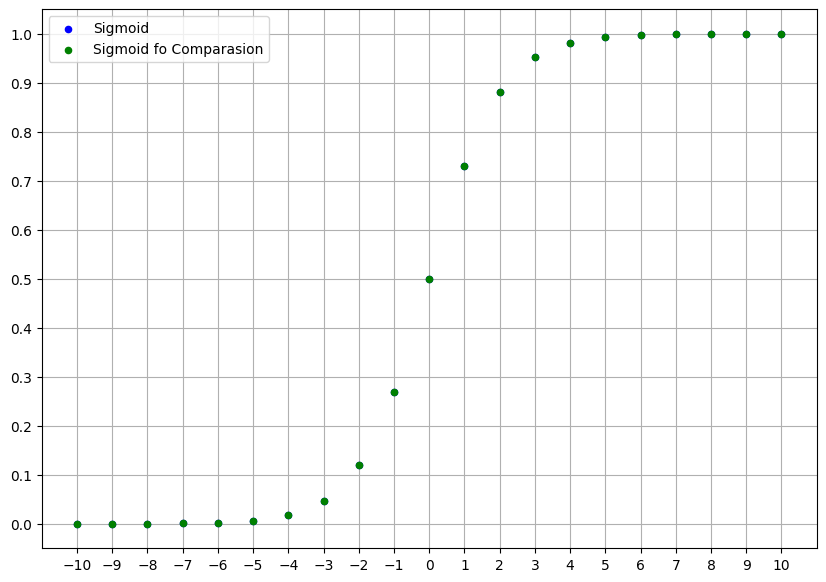

In [ ]:
# Create our base tensor X
x = torch.arange(-10,11,1)

# Create our Sigmoid function
y = 1 / (1 + torch.exp(-x))

# Display our Sigmoid
y_2 = torch.sigmoid(x)
plt_sigmoid(x, y, x, y_2)

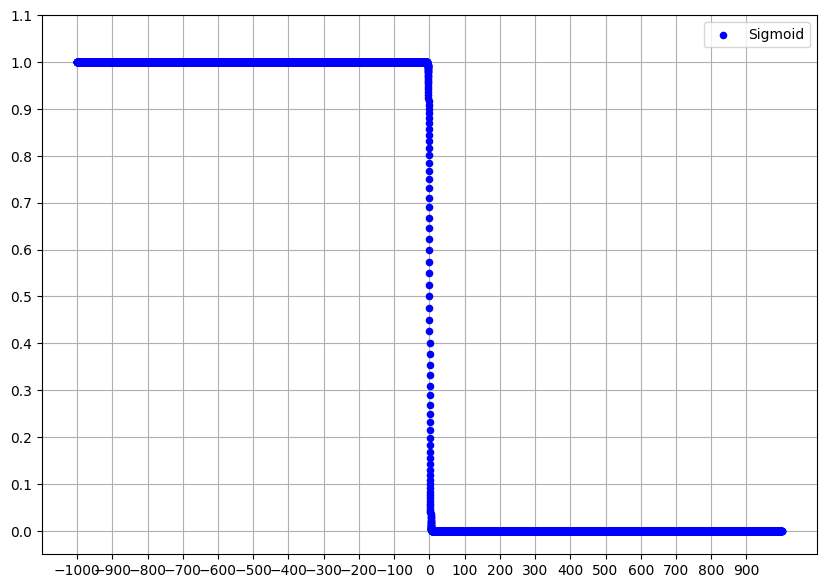

In [ ]:
# Create a Large Sigmoid
x = torch.arange(-1000,1000,0.1)

# Create our Sigmoid function
y = 1 / (1 + torch.exp(x))

# Display our Sigmoid
plt_sigmoid(x, y)

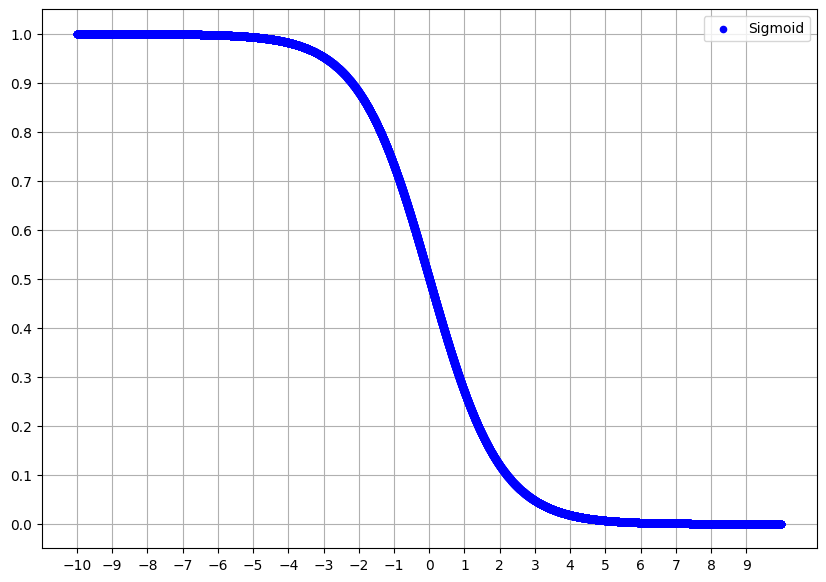

In [ ]:
# Create a small sigmoid with many data points
x = torch.arange(-10,10,0.001)

# Create our Sigmoid function
y = 1 / (1 + torch.exp(x))

# Display our Sigmoid
plt_sigmoid(x, y)

(tensor(0.3010), tensor(0.5000))

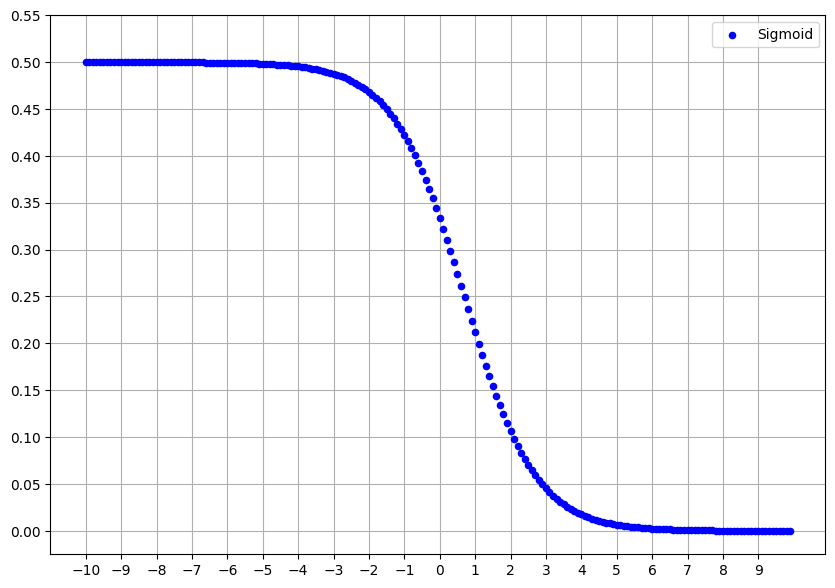

In [ ]:
# Create our base tensor X
x = torch.arange(-10,10,0.1)

# Create our Sigmoid function + Because we used 1 / *2* + torch.exp(x), the sigmoid was divided in half, so now it converts numbers from 0 - 0.5, and its center also shifted and is no longer 0 but
y = 1 / (2 + torch.exp(x))

# Display our Sigmoid
plt_sigmoid(x, y)

# we can also calculate its center, meaning we want to find the x value when y is max value / 2
mid = torch.log10(1/y.max()) # <- simple expression from the formula y = 1 / (1 + e**x) => e**x = 1/y => x * log e = log (1/y) => x = log (1/y)
mid, y.max()

Střed Sigmoidu je: tensor(-0.9998)


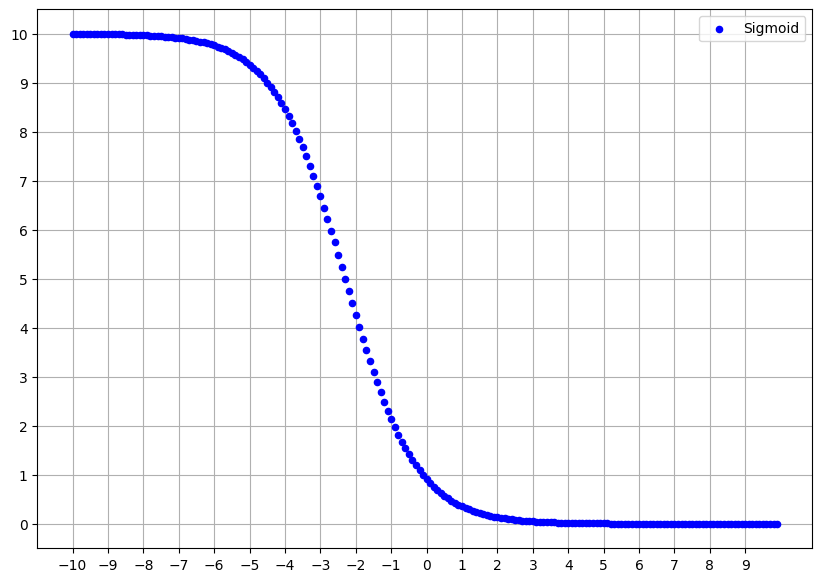

In [ ]:
# Create our base tensor X
x = torch.arange(-10,10,0.1)

# Create our Sigmoid function + Because we used 1 / *0.1* + torch.exp(x), the sigmoid shifted and its center is now at half, so now it converts numbers from 0 - 0.5
y = 1 / (0.1 + torch.exp(x))

# Display our Sigmoid
plt_sigmoid(x, y)
mid = torch.log10(1/y.max())
print("The center of the Sigmoid is:", mid)

Střed Sigmoidu1 je:  tensor(1.9725e-05)  Střed Sigmoidu2 je:  tensor(-0.5962)


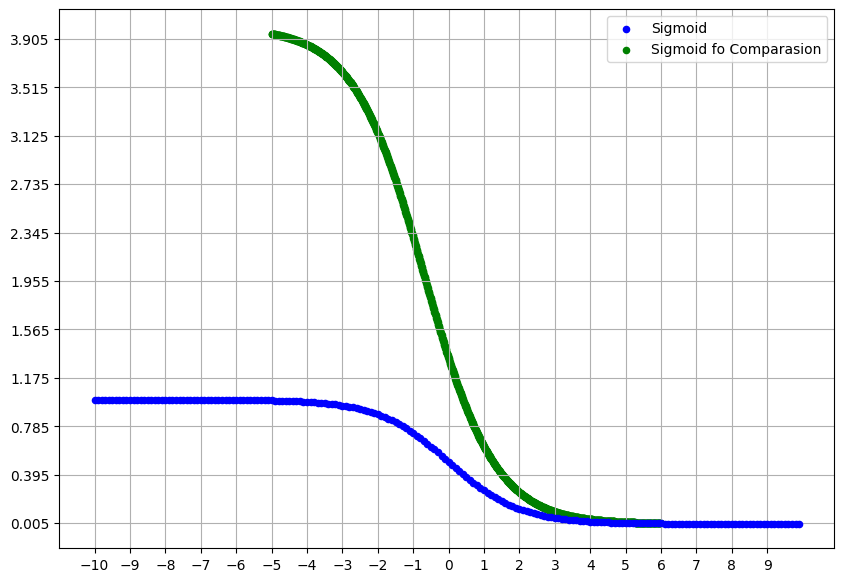

In [ ]:
# create 2 test tensors that you can freely modify and compare
# X Y
x = torch.arange(-10,10,0.1)

y = 1 / (1 + torch.exp(x))

# A B
a = torch.arange(-5,6,0.01)

b = 2 / (0.5 + torch.exp(a))



# Display our Sigmoid
plt_sigmoid(x, y, a, b)

mid1 = torch.log10(1/y.max())
mid2 = torch.log10(1/b.max())
print("The center of Sigmoid1 is: ", mid1, " The center of Sigmoid2 is: ", mid2)